<strong>Comparaison des estimateurs en 5 cas différents</strong>

In [1]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(magrittr)
library(stringr)
library(tools)
library(patchwork)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'magrittr'


The following object is masked from 'package:tidyr':

    extract




In [2]:
options(repr.plot.width = 16, repr.plot.height = 12)

In [3]:
get_dataframes <- function(effect, n_sims) {
    ## Cette fonction permet de fusionner plusieurs dataframes en un seul
    ## afin d'avoir le bon format pour ggplot2
    ## arguments:
    ##    effet: effet direct ou indirect comme chaîne de caractères
    ##    n_sims: vecteur contenant le nombre de simulations
    pattern <- paste0("^", effect, "_", "[0-9]")
    my_files <- list.files(pattern = pattern, ignore.case = TRUE)
    my_data <- lapply(my_files, read.csv)

    big_data <- bind_rows(my_data)
    if (startsWith(effect, "sde")) {
        colnames(big_data) <- str_replace(colnames(big_data), "SDE_", "")
    } else {
        colnames(big_data) <- str_replace(colnames(big_data), "SIE_", "")
    }
    
    keycol <- "library"
    valuecol <- "bias"
    gathercols <- colnames(big_data)

    data_long <- gather_(big_data, keycol, valuecol, gathercols)
    data_long$n <- c(rep(n_sims[1], n_sims[1]),
                     rep(n_sims[2], n_sims[2]),
                     rep(n_sims[3], n_sims[3]),
                     rep(n_sims[4], n_sims[4]),
                     rep(n_sims[5], n_sims[5]))

    return(data_long)
}

In [4]:
plot_biases <- function(effect, n_sims, main) {
    data_long <- get_dataframes(effect, n_sims)

    ggplot(data_long, aes(y = bias, fill = library)) +
    geom_boxplot() +
    geom_hline(yintercept = 0, linetype = "dashed",
               color = "black", size = 1) +
    facet_wrap(~n, nrow = 2) +
    ggtitle(paste0("Biais sur ", main)) +
    theme(strip.text.x = element_text(size = 12, face = "bold"),
          legend.position = c(.89, .34),
          legend.justification = c("right", "top"),
          legend.box.just = "right",
          legend.margin = margin(6, 6, 6, 6),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 15),
          plot.title = element_text(size = 18, hjust = 0.5)) ->
    p

    return(p)
}

In [5]:
n_sims <- c(100, 250, 500, 750, 1000)

## Données originales

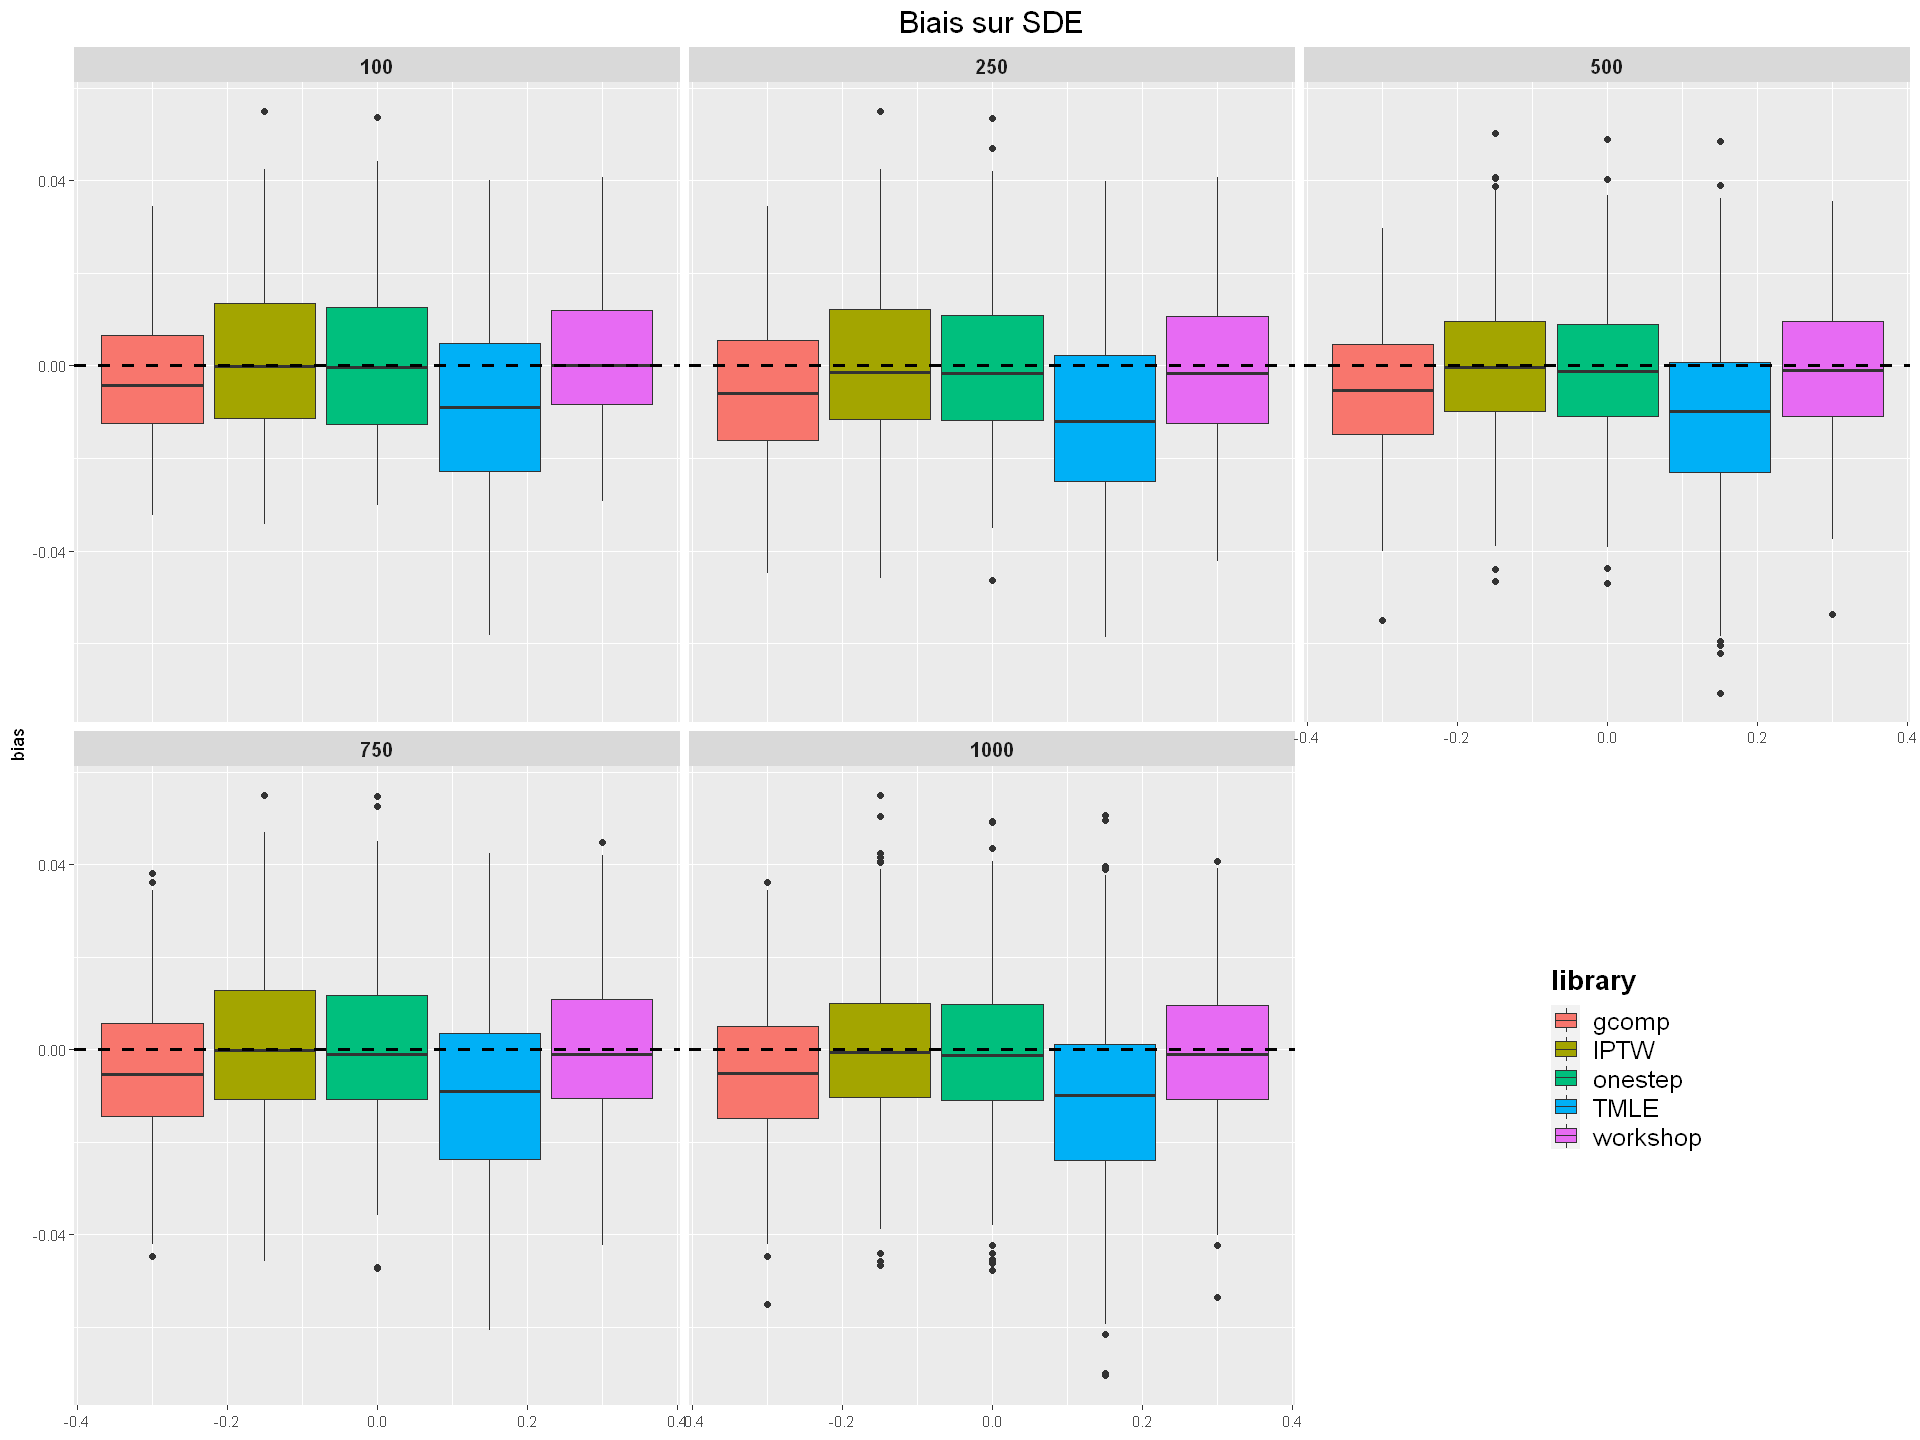

In [6]:
p <- plot_biases("sde", n_sims, "SDE")
print(p)

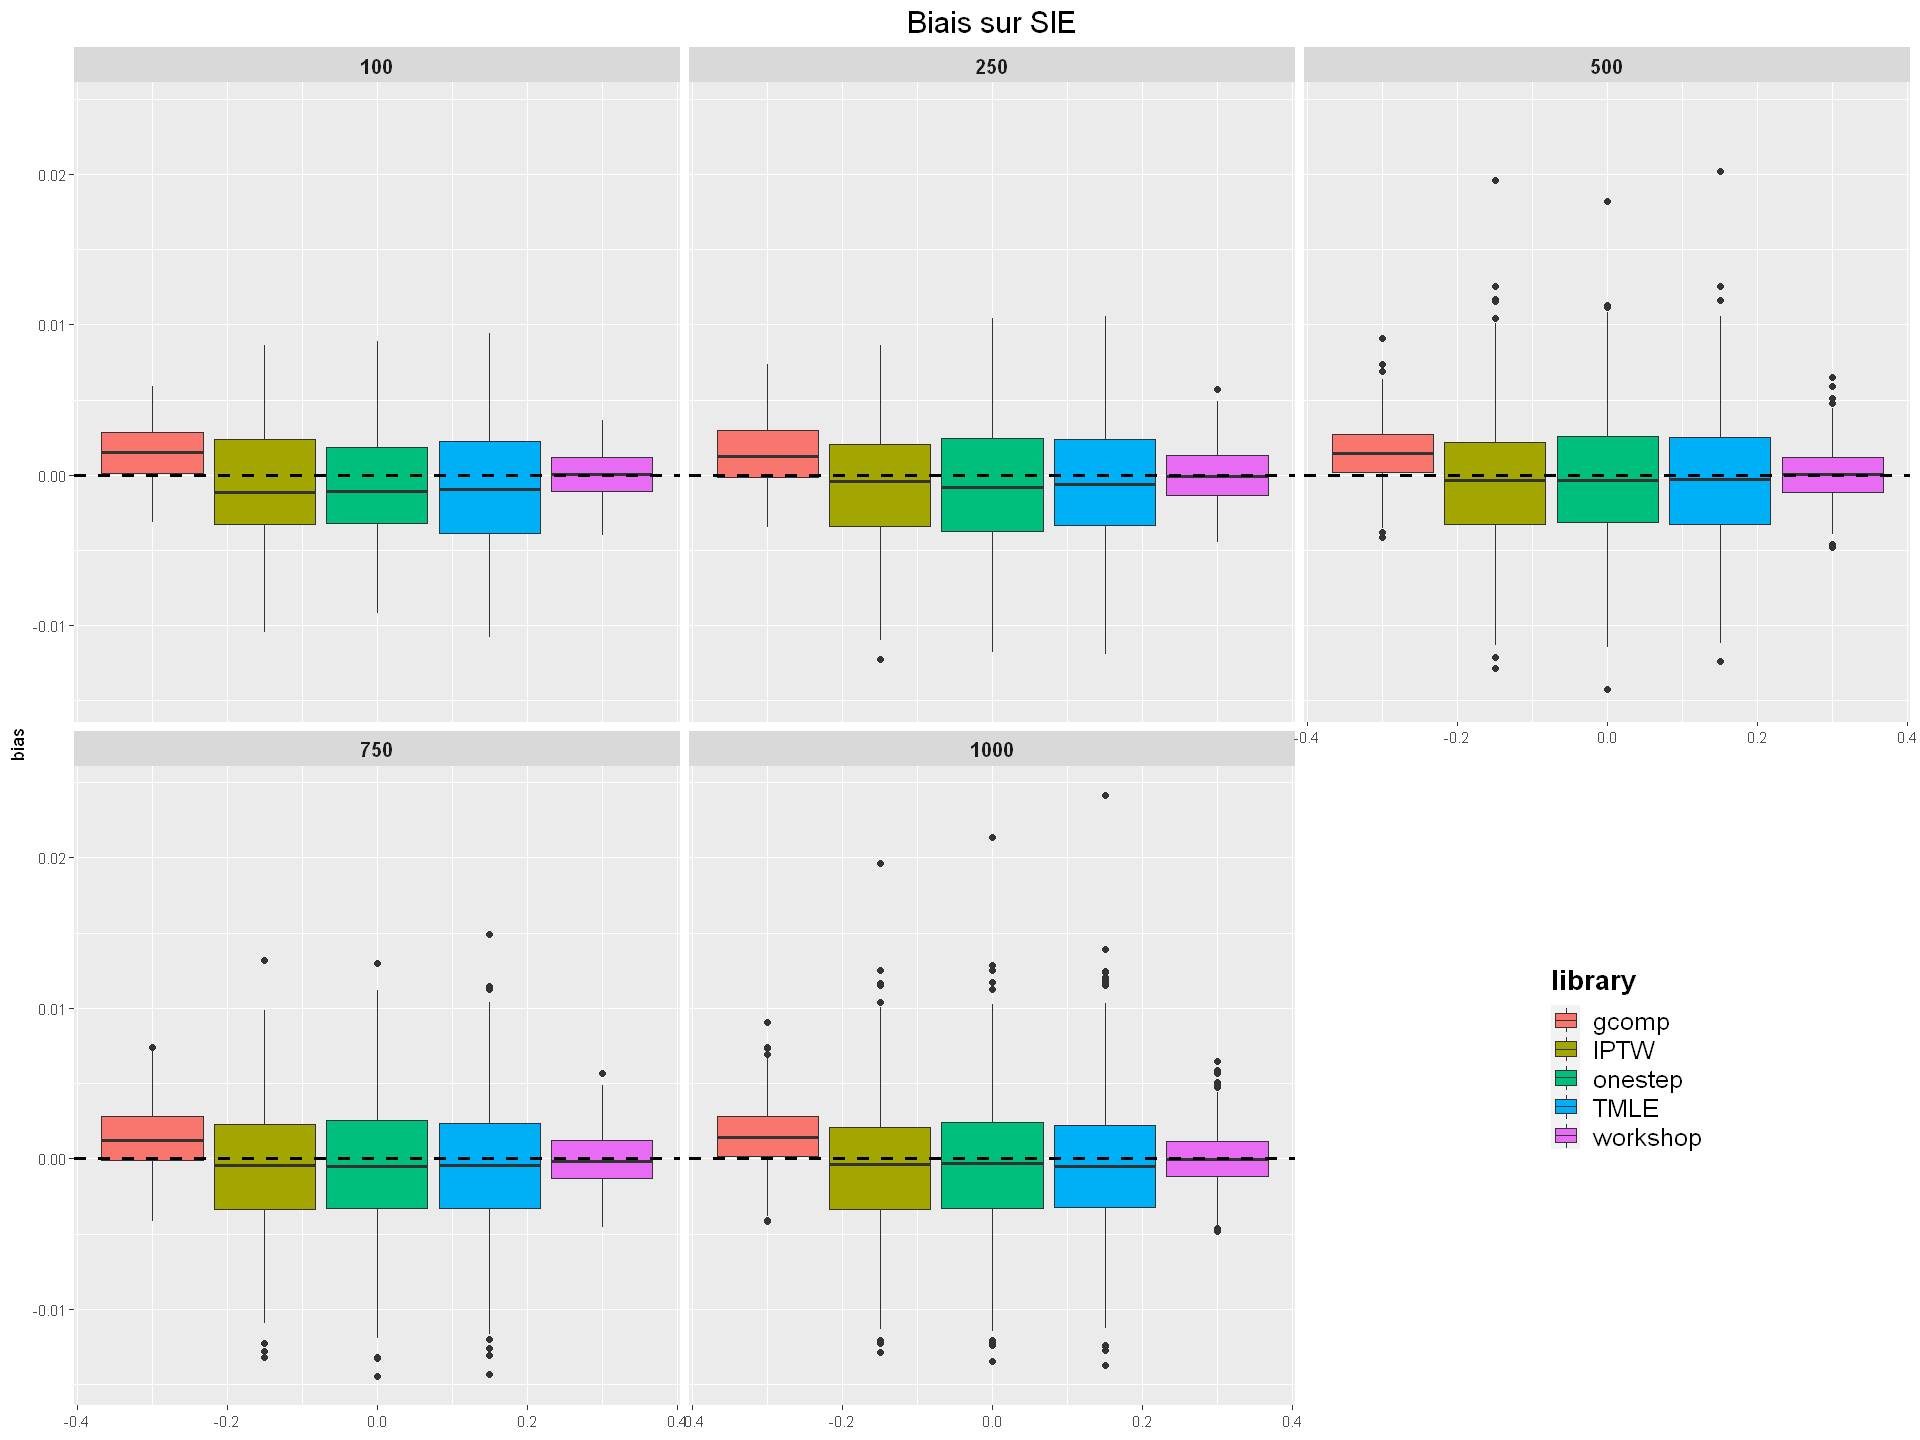

In [7]:
p <- plot_biases("sie", n_sims, "SIE")
print(p)

## Positivité

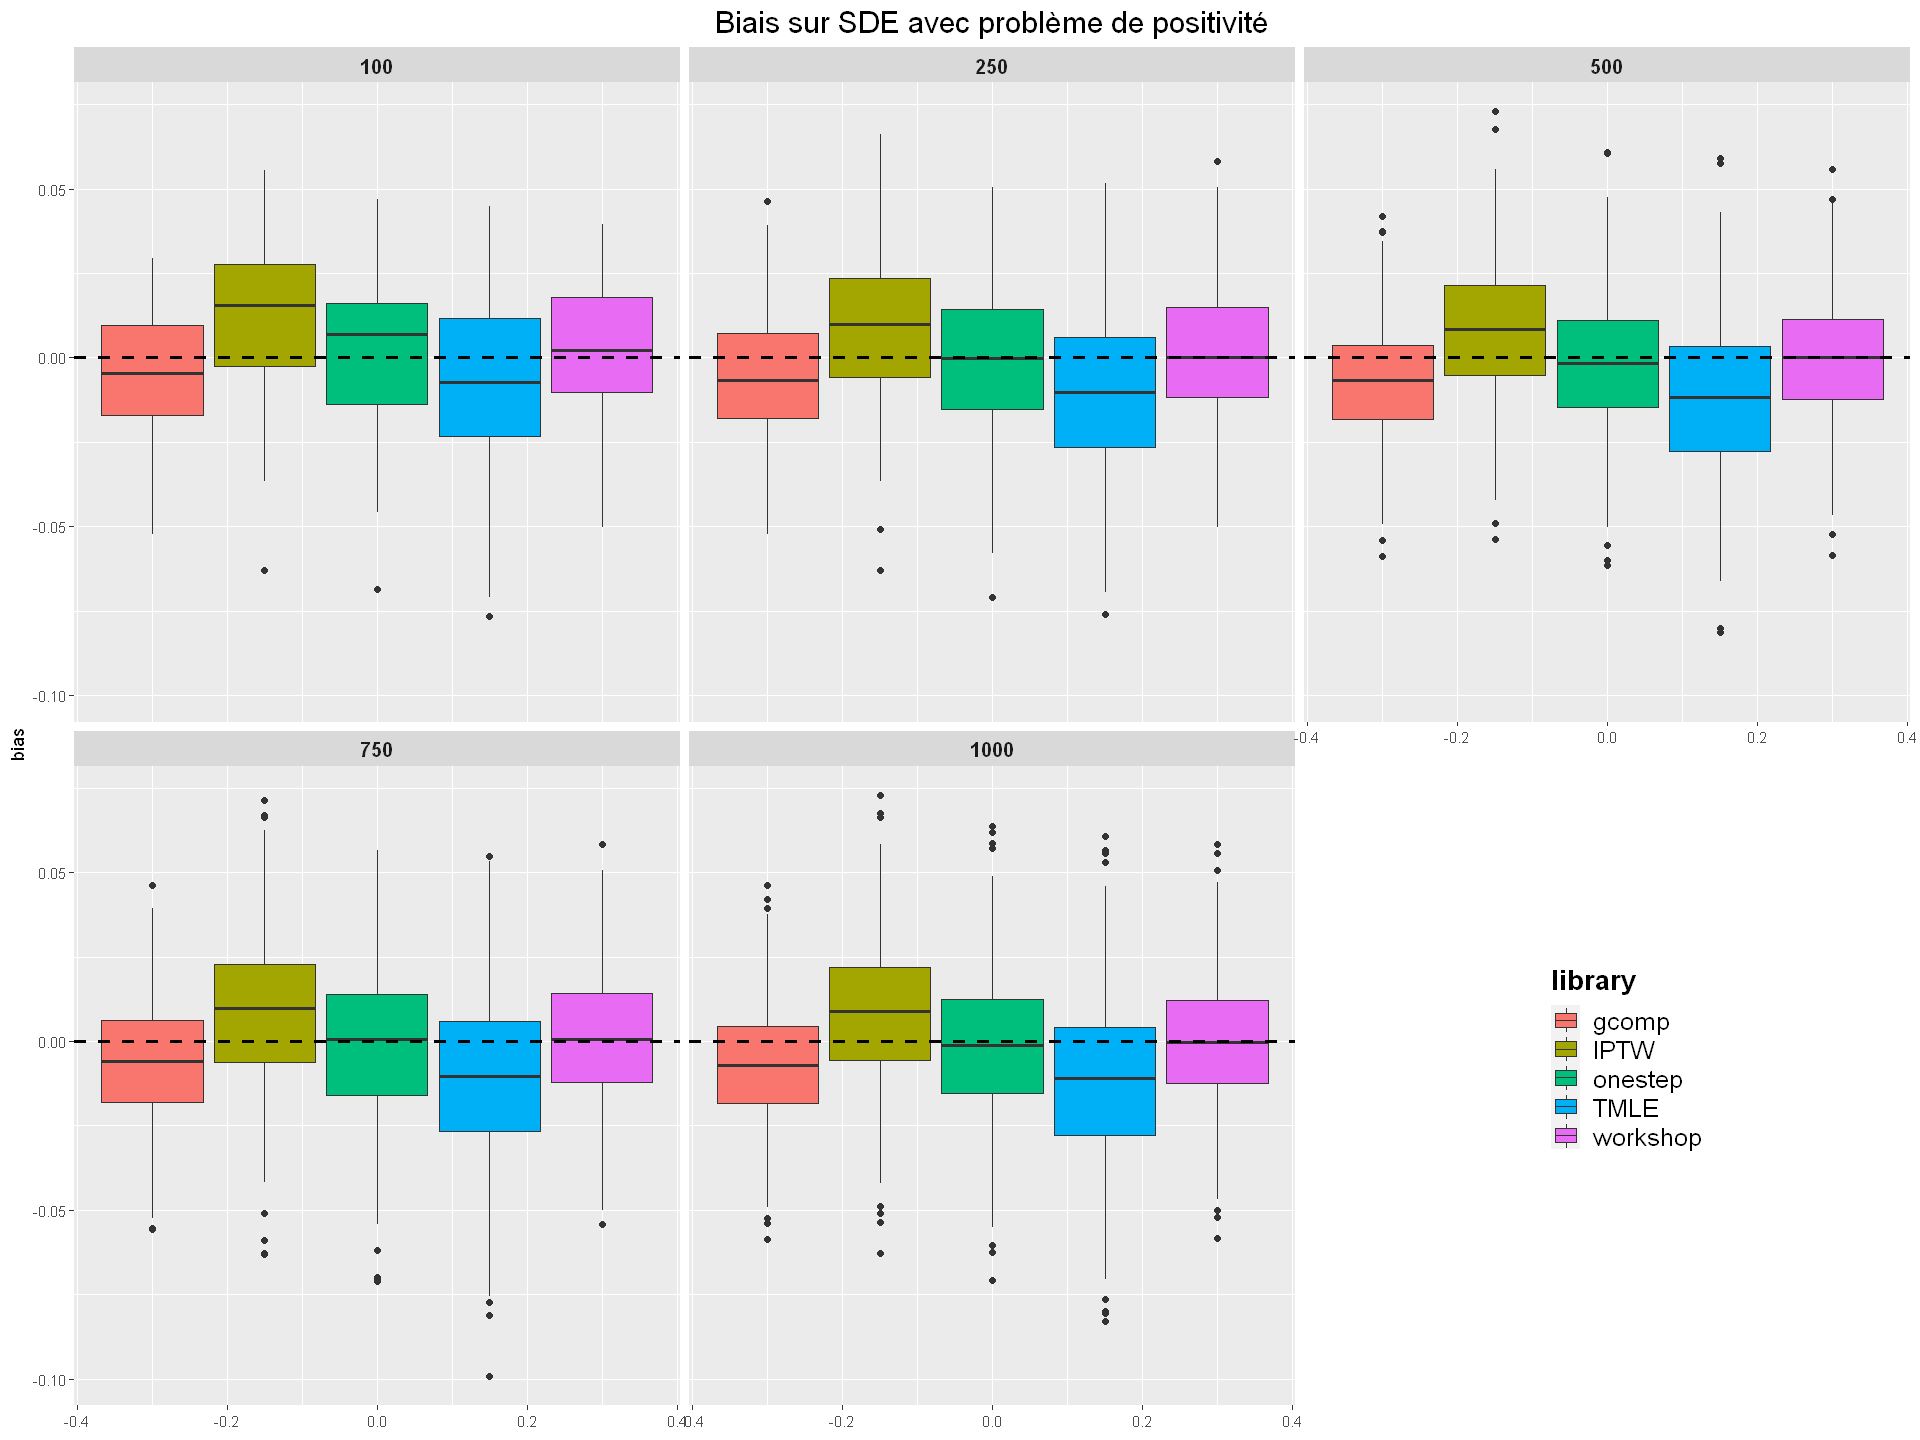

In [8]:
p <- plot_biases("sde_posit", n_sims, "SDE avec problème de positivité")
print(p)

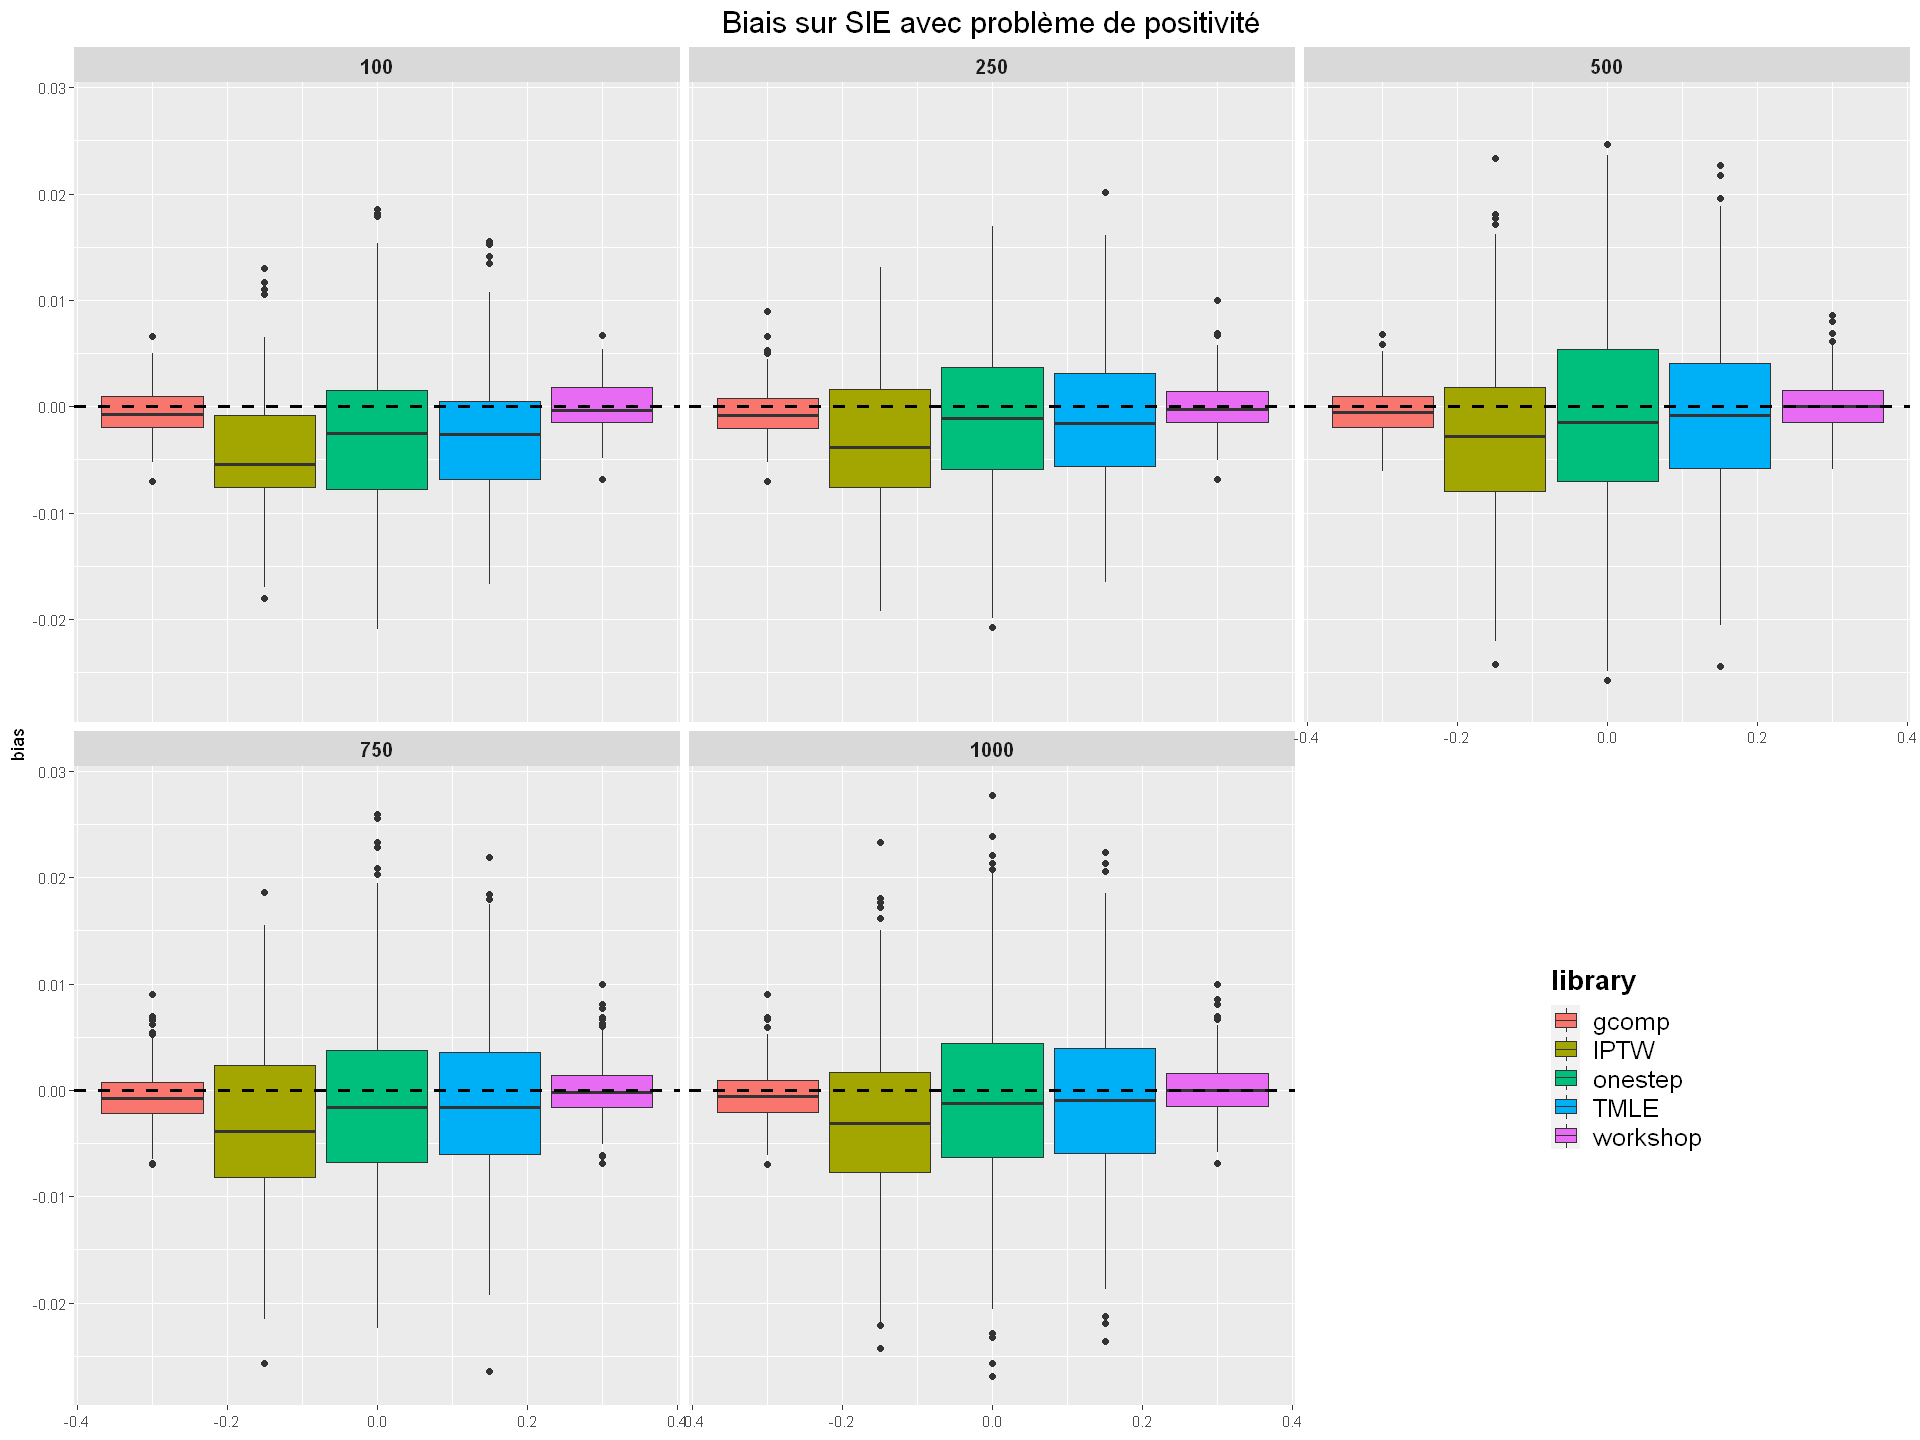

In [9]:
p <- plot_biases("sie_posit", n_sims, "SIE avec problème de positivité")
print(p)

## Variables baseline continues

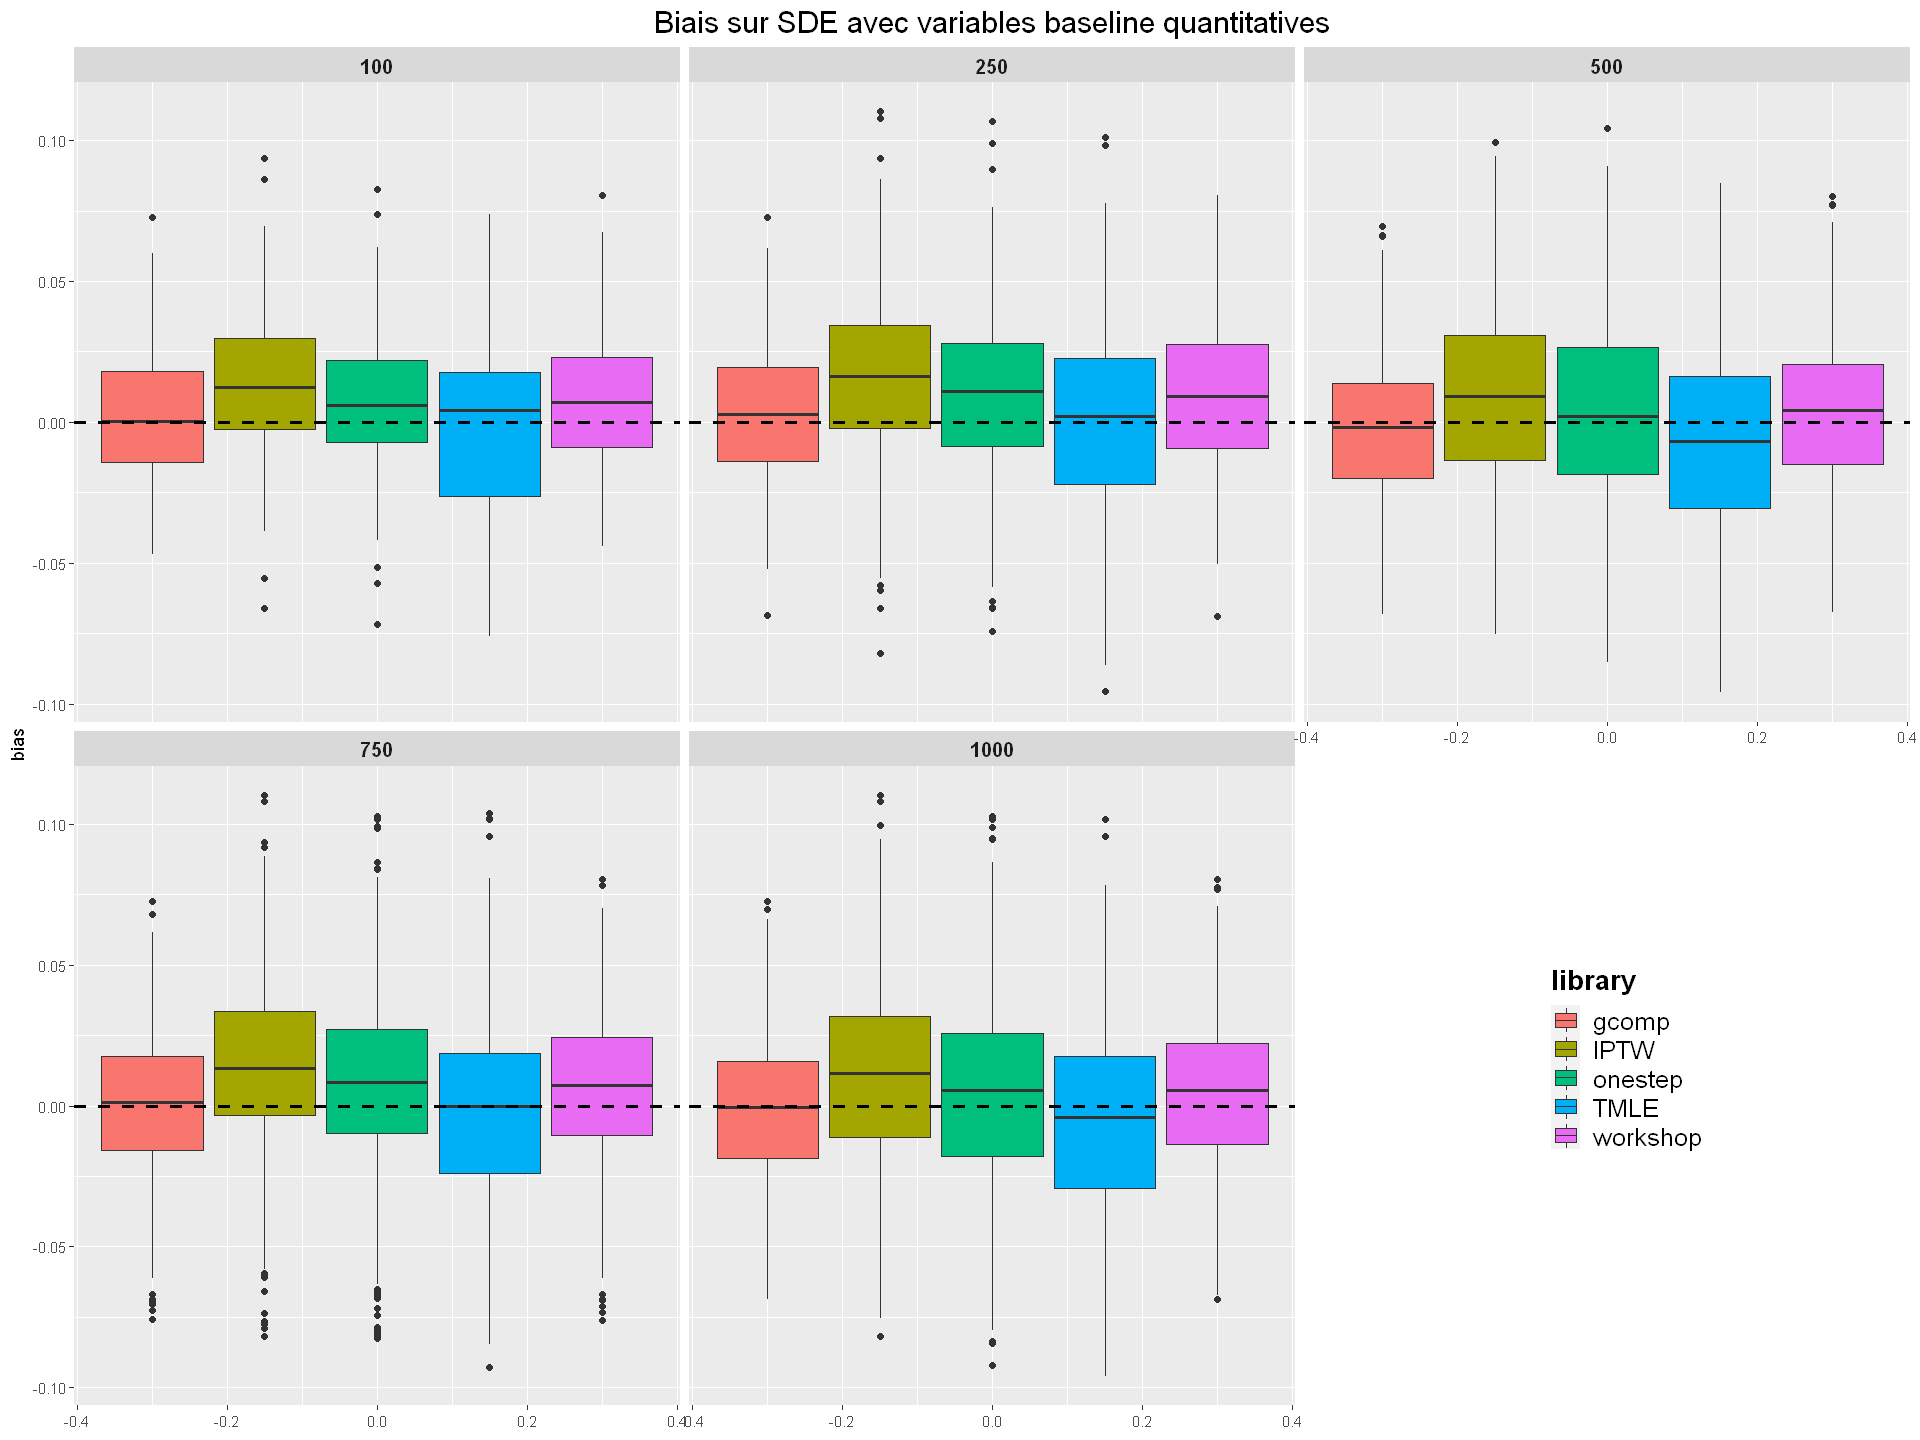

In [10]:
p <- plot_biases("sde_quant", n_sims, "SDE avec variables baseline quantitatives")
print(p)

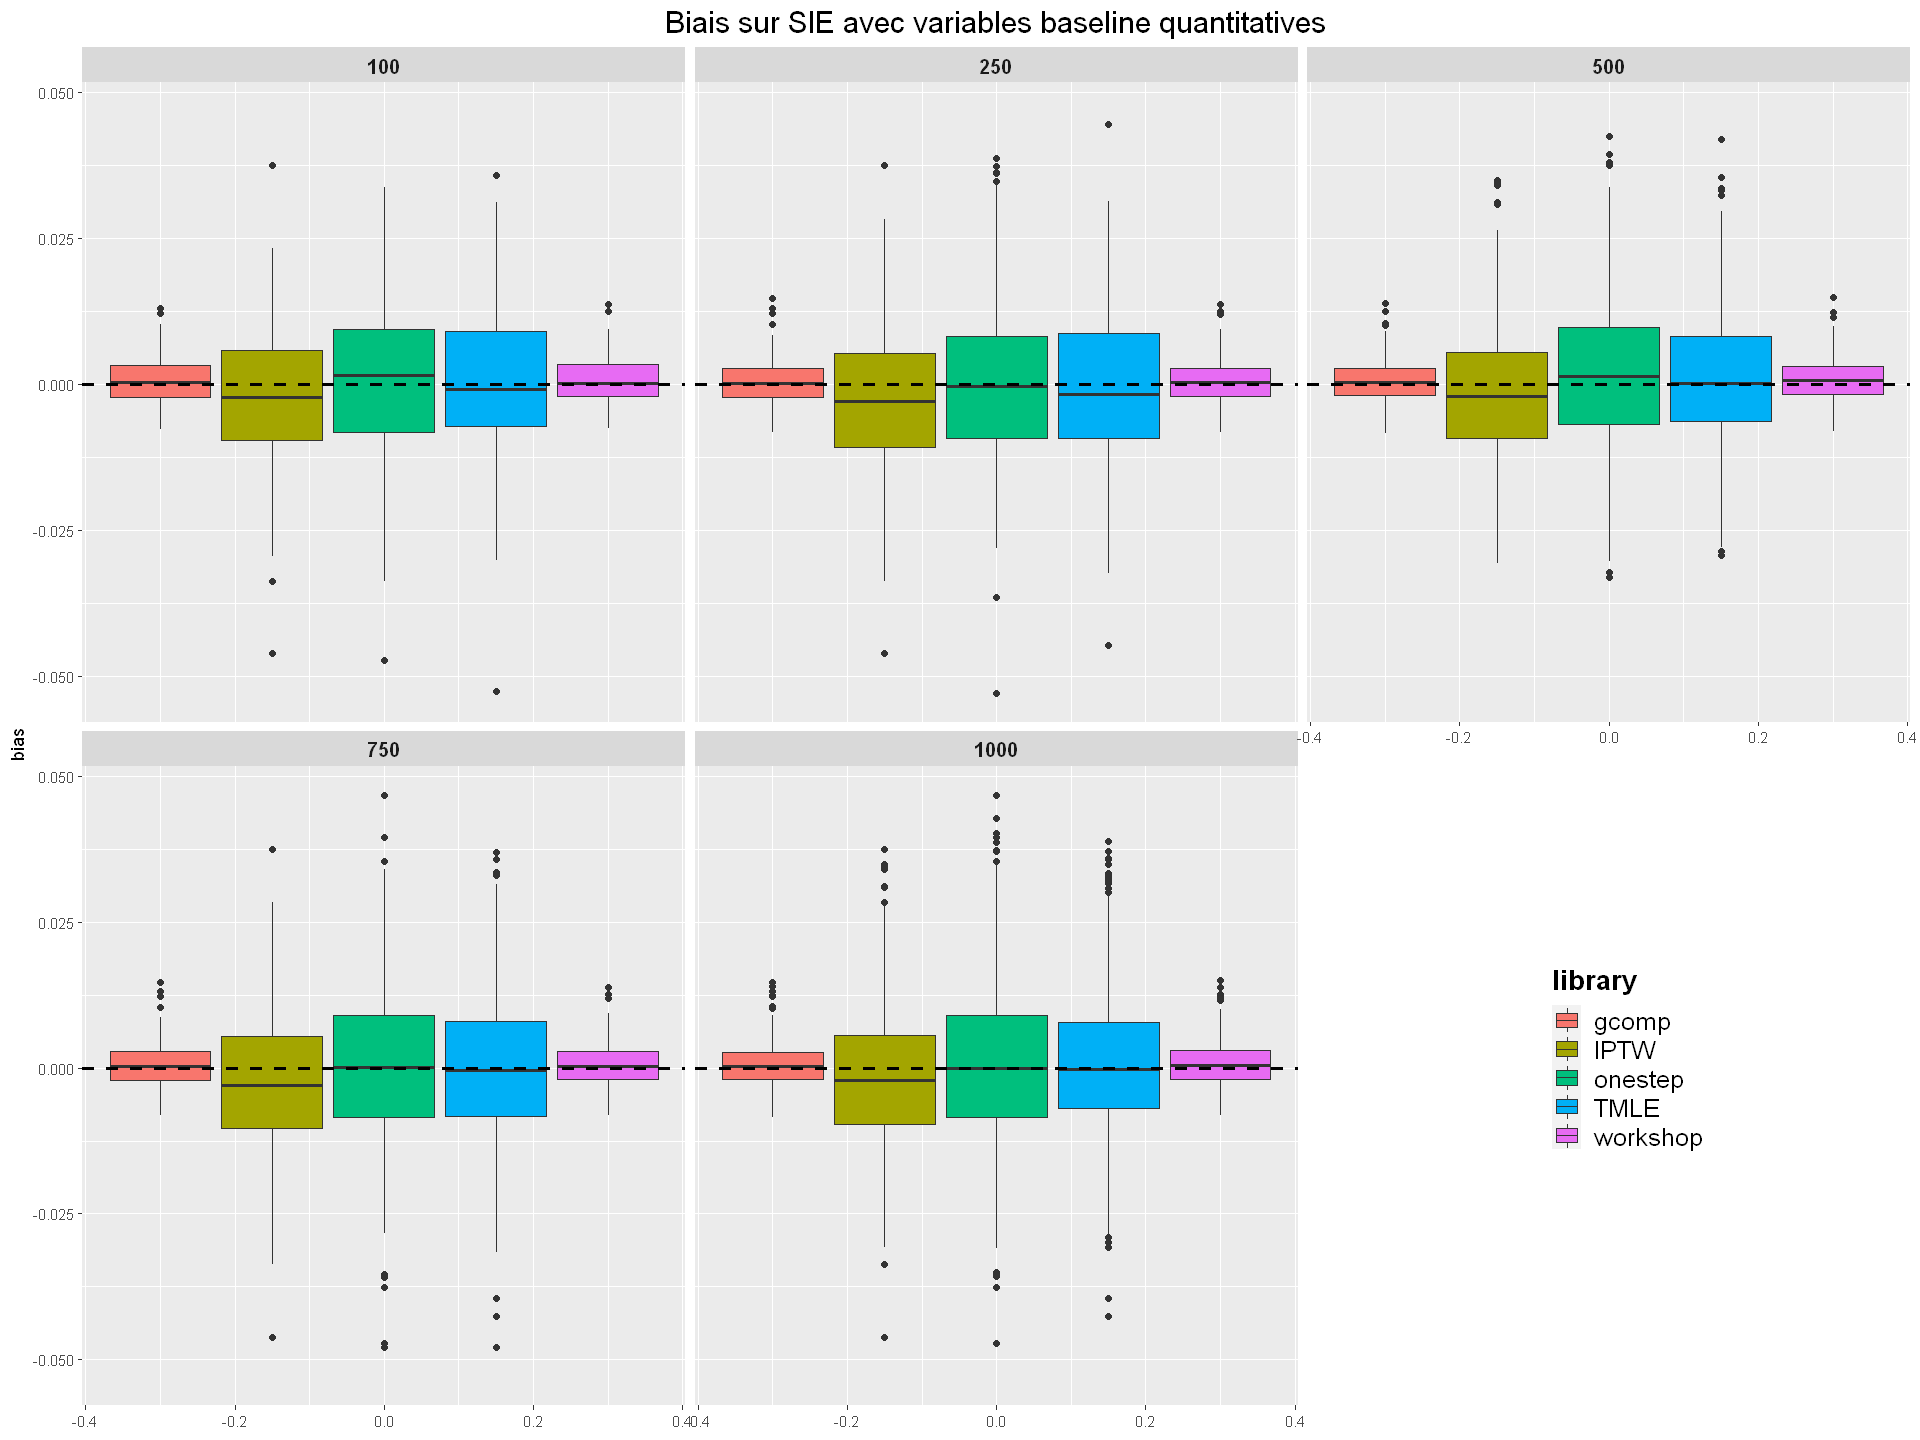

In [11]:
p <- plot_biases("sie_quant", n_sims, "SIE avec variables baseline quantitatives")
print(p)

## Modèle de Rudolph

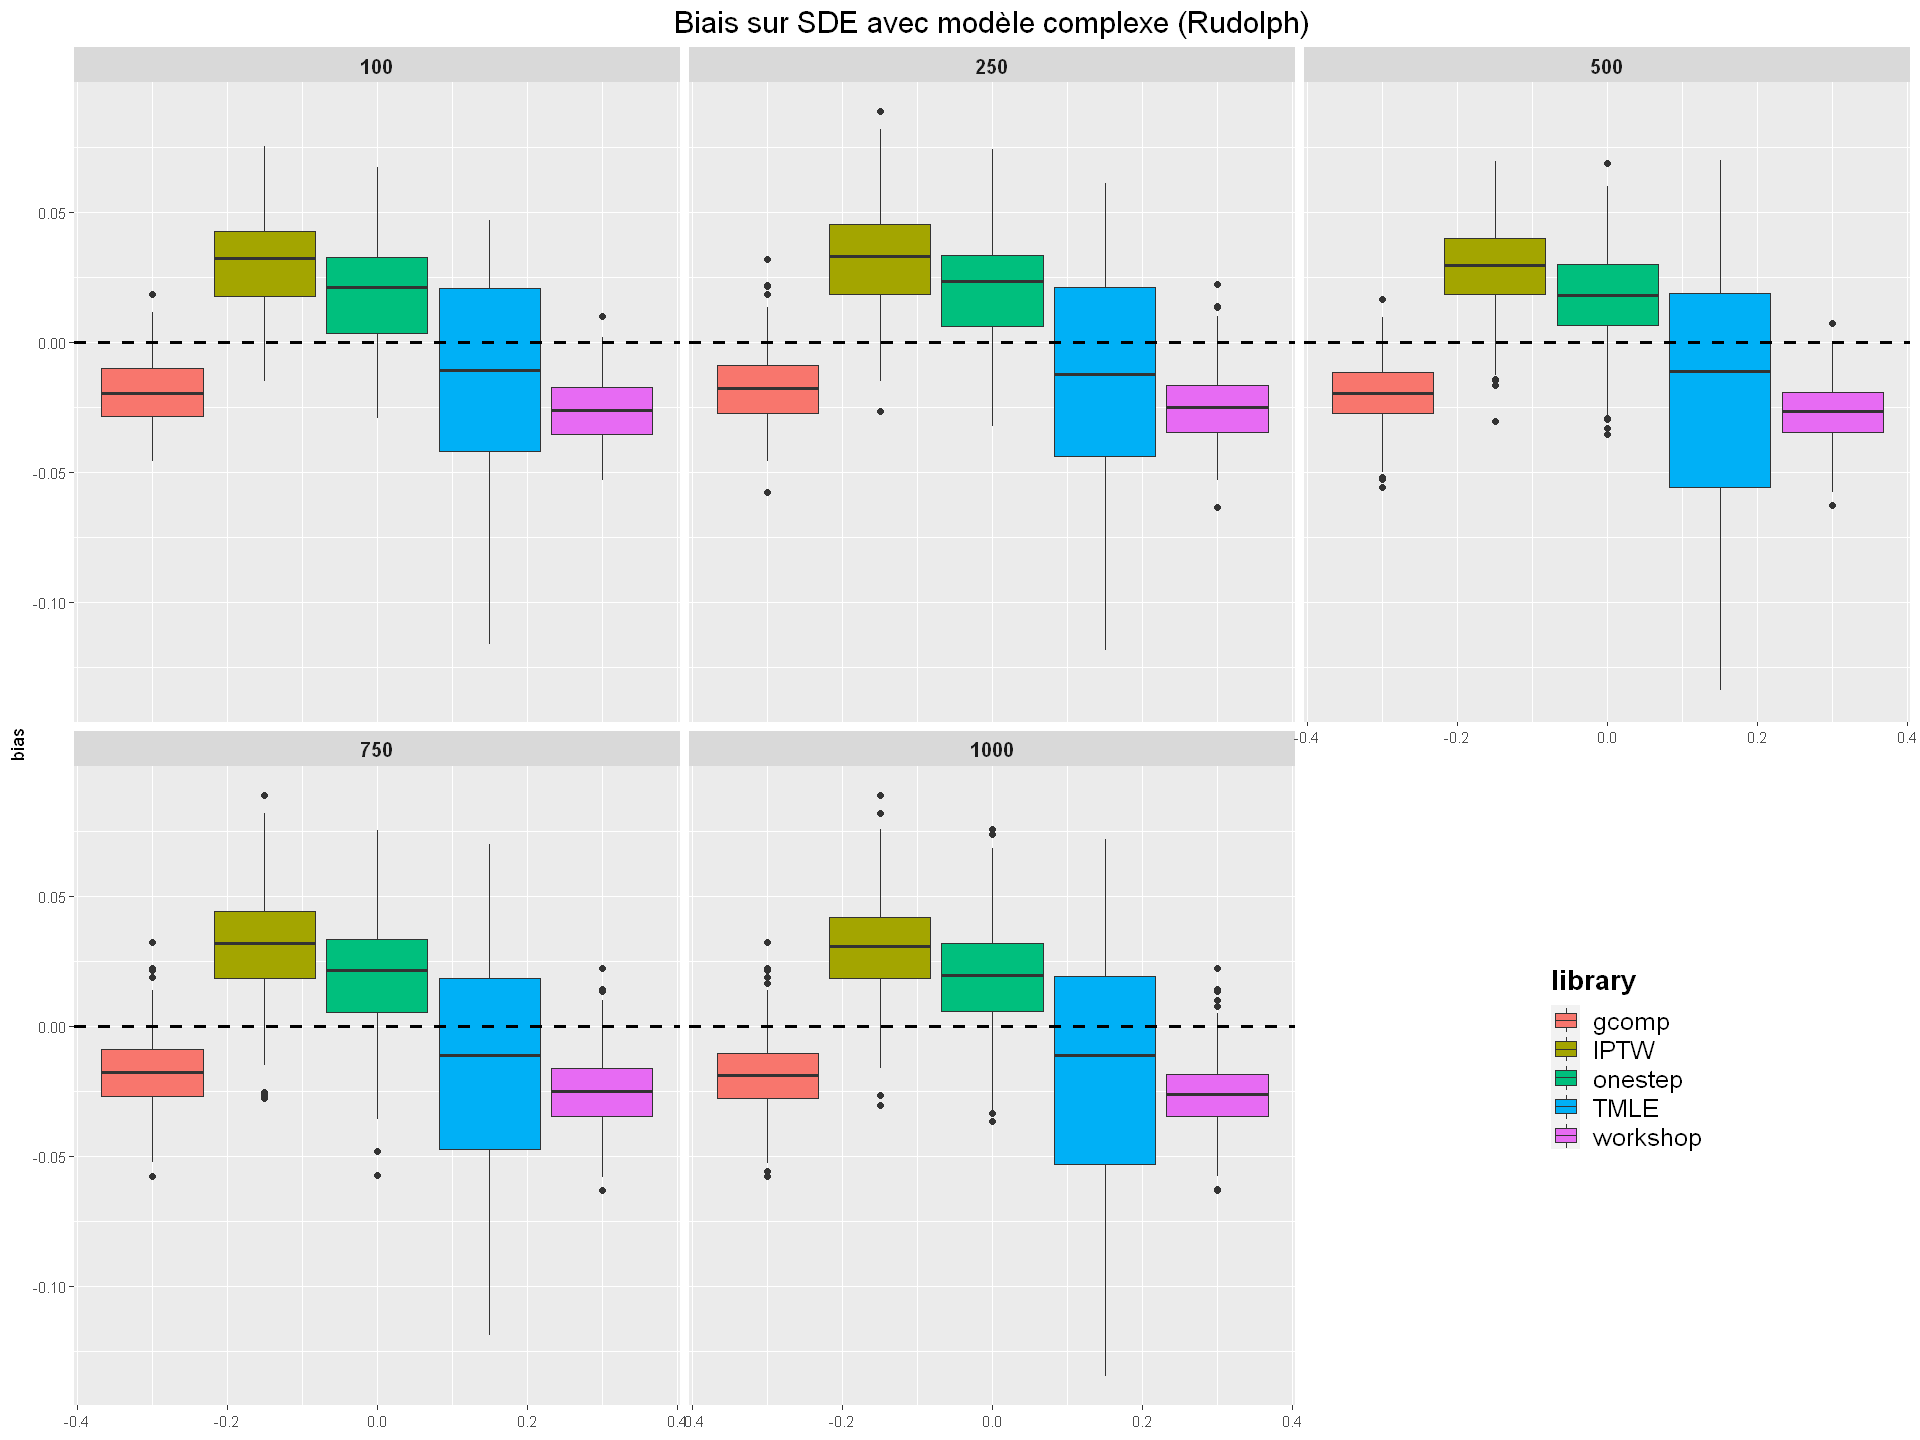

In [12]:
p <- plot_biases("sde_rud", n_sims, "SDE avec modèle complexe (Rudolph)")
print(p)

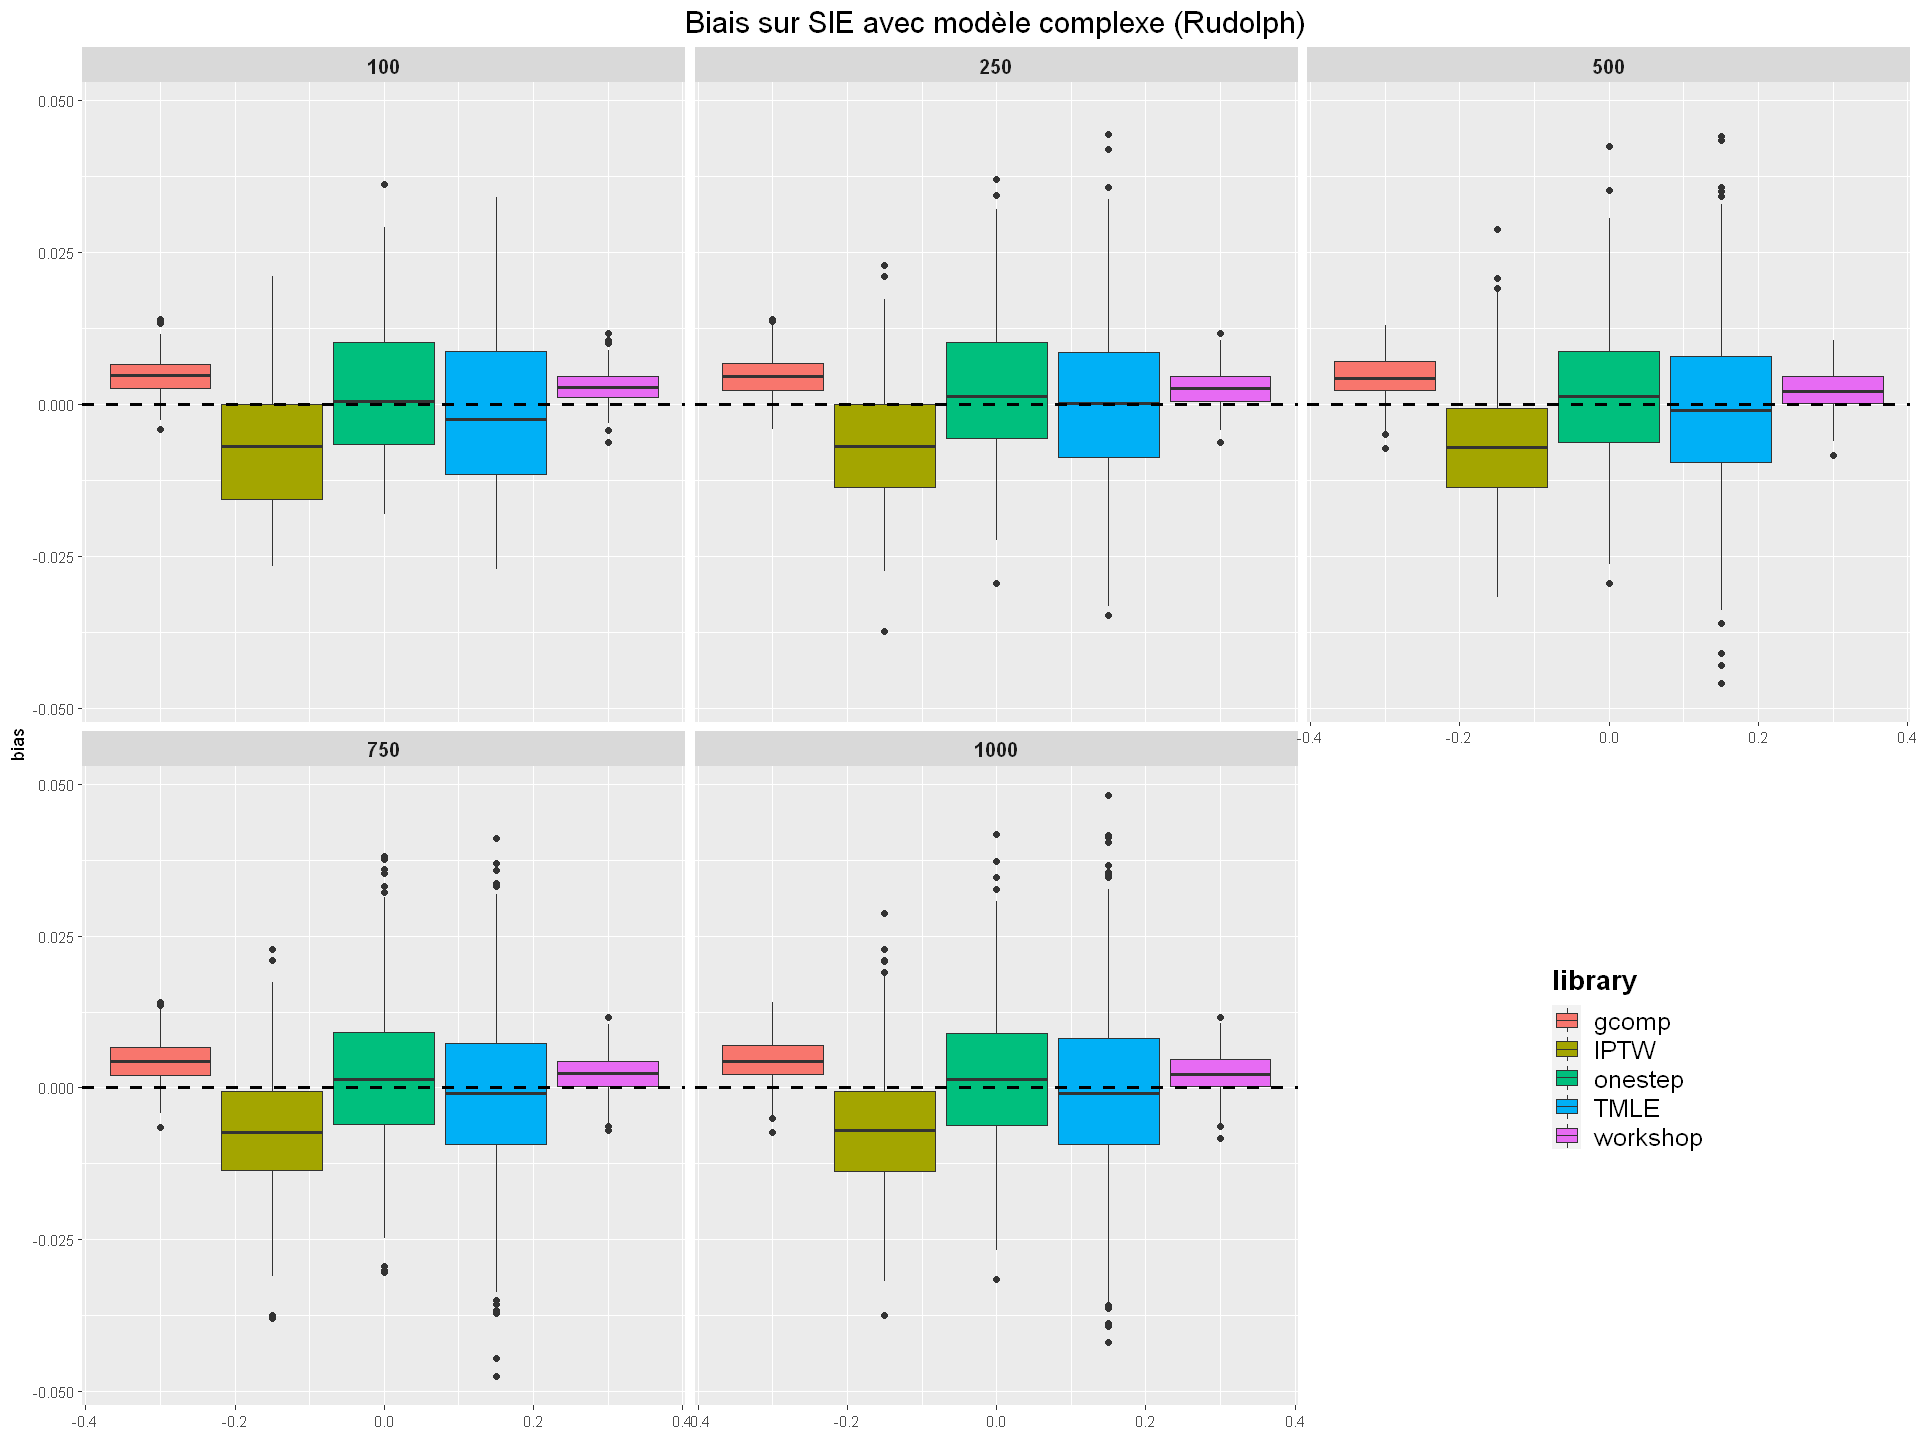

In [13]:
p <- plot_biases("sie_rud", n_sims, "SIE avec modèle complexe (Rudolph)")
print(p)

## Variable de confusion continue

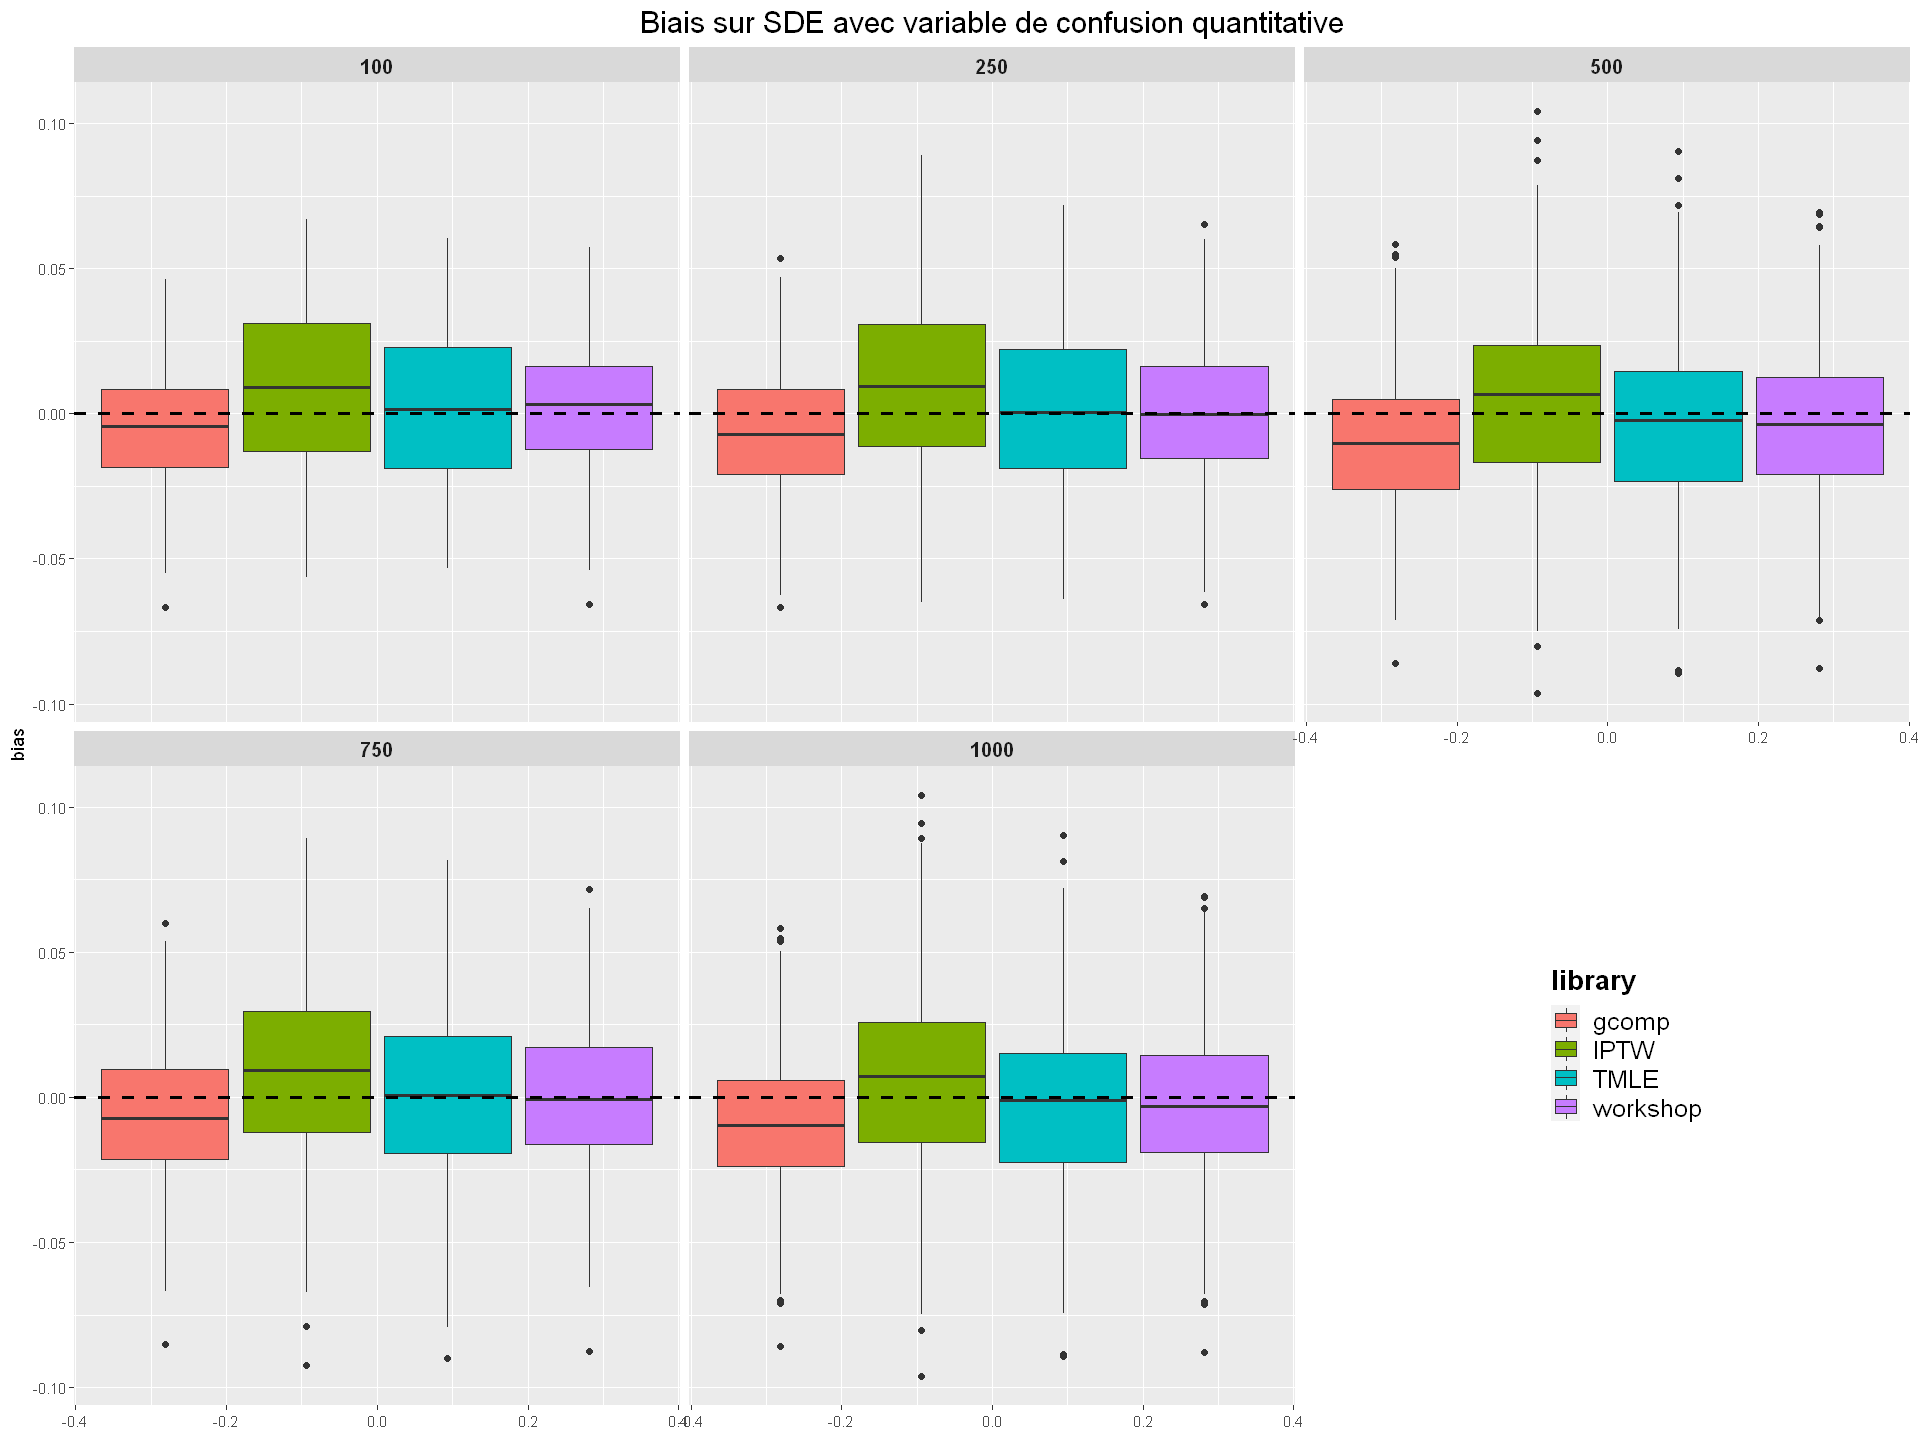

In [14]:
p <- plot_biases("sde_conf", n_sims, "SDE avec variable de confusion quantitative")
print(p)

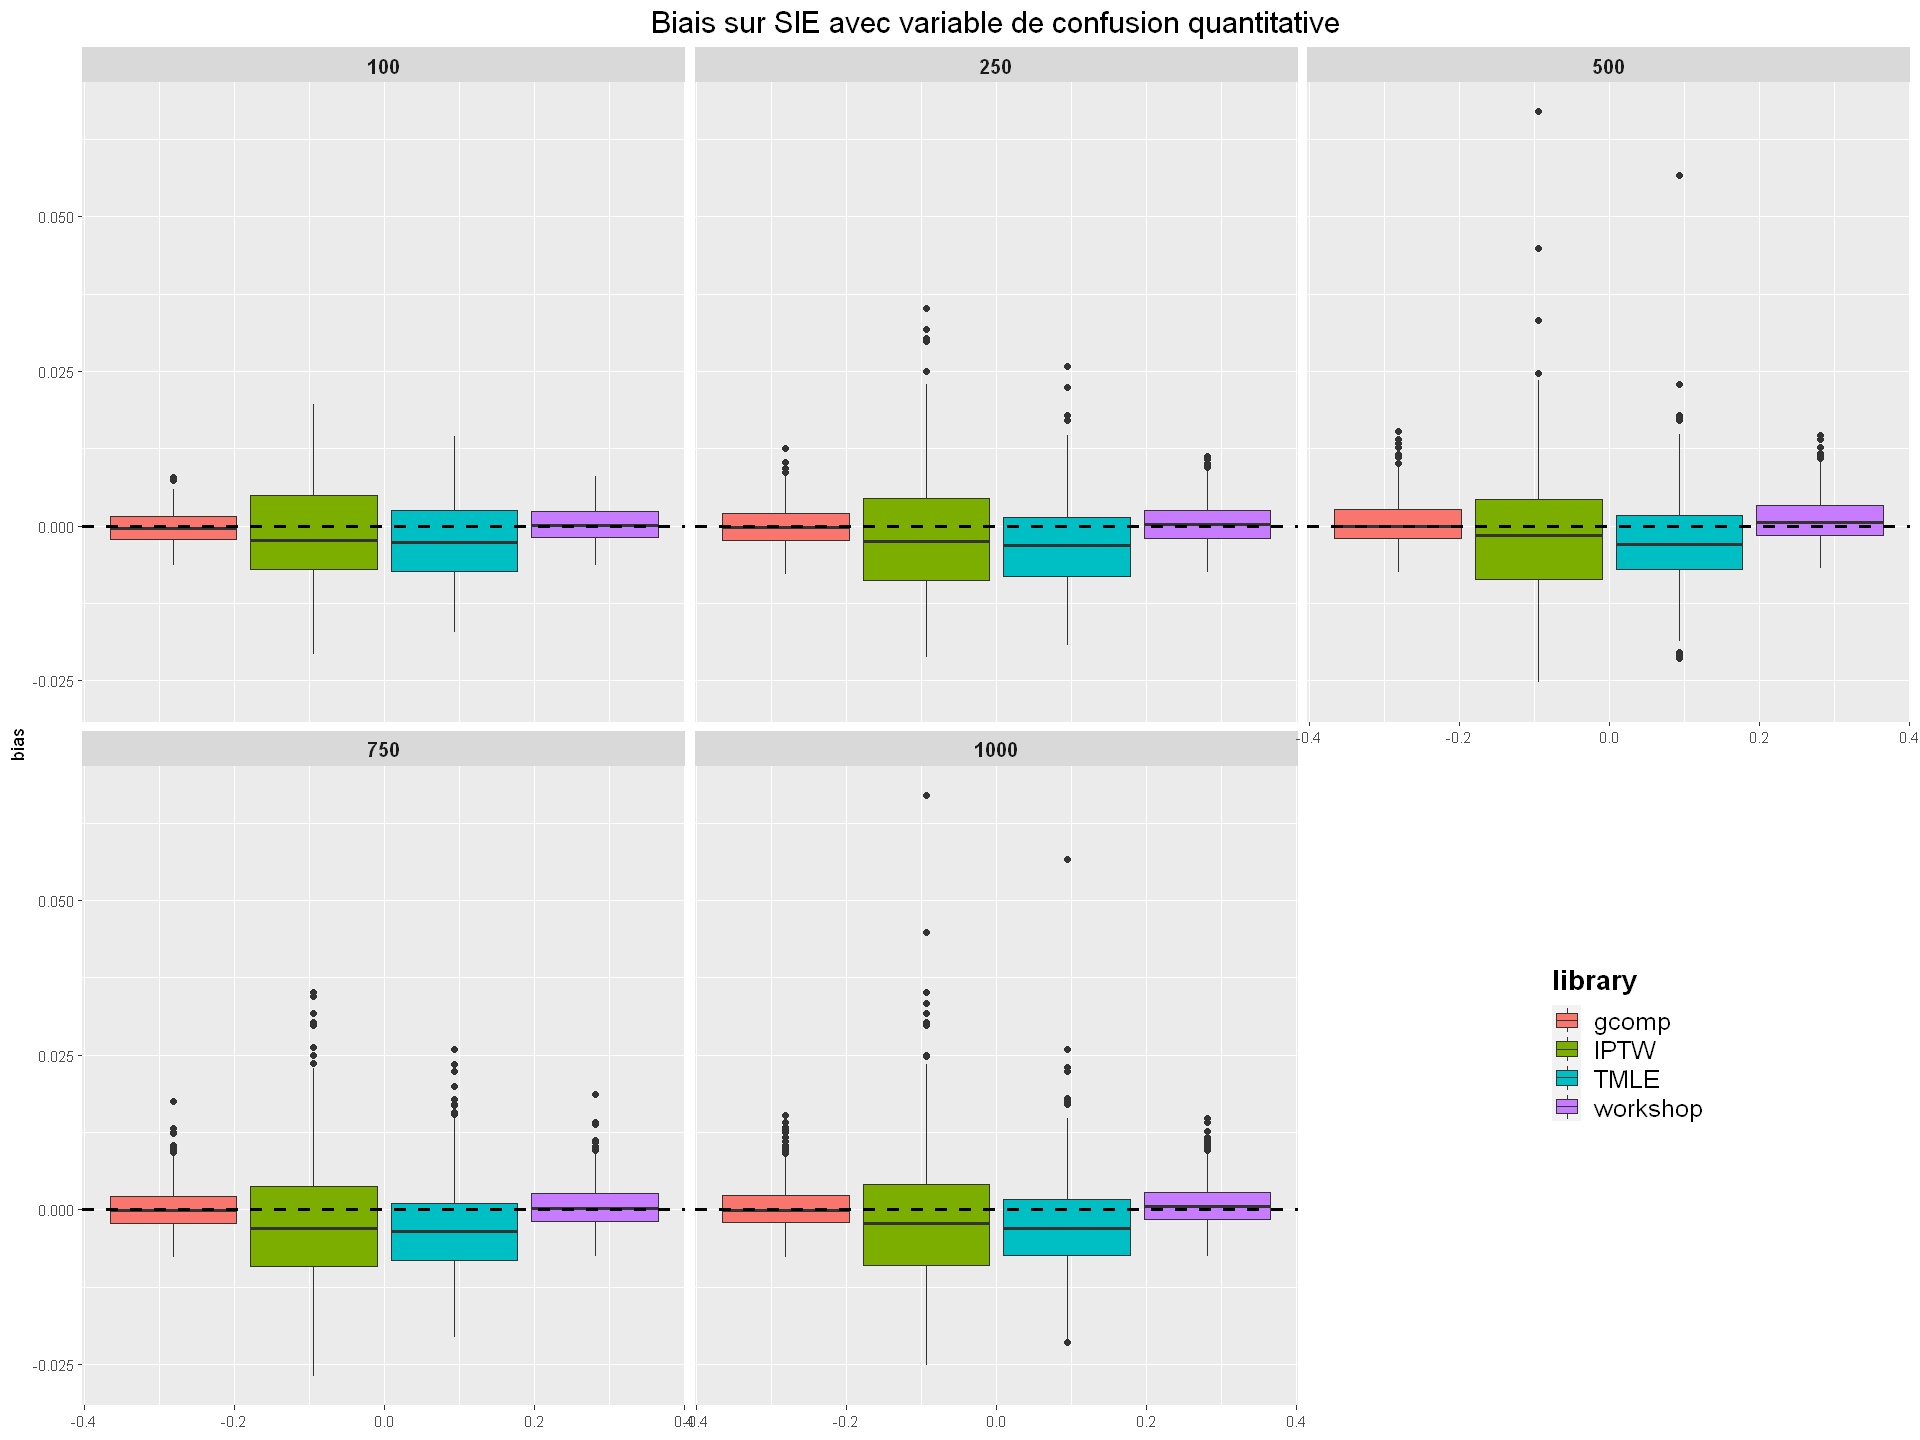

In [15]:
p <- plot_biases("sie_conf", n_sims, "SIE avec variable de confusion quantitative")
print(p)